# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective 

At the end of the experiment, you will be able to:

*  understand clustering
*  find groups or clusters using K-means algorithm

In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/3March/kmeans.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

The dataset choosen for this experiment is a hand-made dataset. We have generated the data programmatically by following Random / Gaussian distribution. The dataset includes 3000 instances where each instance is made up of 2 features.

## AIML Technique

### Clustering

Given an unfamiliar dataset, a clustering algorithm helps to discover groups of objects where the average distances between the members of each cluster are closer than to members in other clusters.

Clustering is used to find structure in unlabeled data. It’s the most common form of unsupervised learning. 

Several Algorithms have been proposed for clustering. However, when compared to other clustering algorithms the K-means algorithm is more effective. This is because K-means allows us to pre-cluster the database which in turn produces good results.

Additionally, K-means clustering is the simplest to implement and to run. All we need to do is choose the number of clusters(K) and run it number of times.

We use K-means algorithm for clustering in this experiment.

### K-means Algorithm

K-means clustering is the process of partitioning a set of data objects into subsets. Each subset is a cluster such that the similarity within the cluster is greater and the similarity between the other clusters is less. 

K-means algorithm iteratively performs these two steps: 

1. The first step assigns clusters to points by assigning them to the cluster with nearest centroid. 
2. The second step calculates the new mean from the points belonging to the cluster. 

We repeat these two steps till convergence.

### Setup Steps

In [1]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W10_16_Kmeans_Clustering_B" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week8/Exp2/AIML_DS_CLARA_STD.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


Let us learn the kmeans algorithm step by step.

### Importing required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

### Load the dataset

In [6]:
# Setting up the file. The data below is a simple Gaussian distribution of data.
dataset = "AIML_DS_CLARA_STD.csv"

In [7]:
data = pd.read_csv(dataset)
print(data)

      Unnamed: 0         V1         V2
0              1   2.072345  -3.241693
1              2  17.936710  15.784810
2              3   1.083576   7.319176
3              4  11.120670  14.406780
4              5  23.711550   2.557729
...          ...        ...        ...
2995        2996  85.652800  -6.461061
2996        2997  82.770880  -2.373299
2997        2998  64.465320 -10.501360
2998        2999  90.722820 -12.255840
2999        3000  64.879760 -24.877310

[3000 rows x 3 columns]


### Get the data values and plot them

In [9]:
# Storing the values in seperate variables
f1 = data['V1'].values
f2 = data['V2'].values

# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))# YOUR CODE HERE : From the two 1-dim Gaussian variables 'f1' and 'f2', create a 2-d gaussian variable 'X' (Hint: By zipping them together)

### Visualize the data values

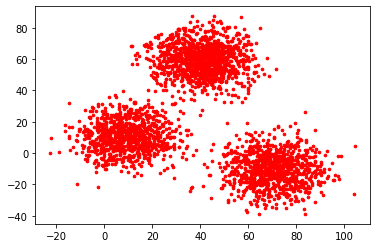

In [10]:
# YOUR CODE HERE : Scatter plot 'f1' vs 'f2'
plt.scatter(f1, f2, c='red', s=7)
plt.show()

### We will intialize three cluster centers randomly to start with the k-means algorithm.

Note: Refer to [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

In [11]:
# Number of clusters
k = 3

# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[70. 81.]
 [45. 51.]
 [76. 28.]]


### Let us visualize the data when the algorithm gets intialized along with the Centroids

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


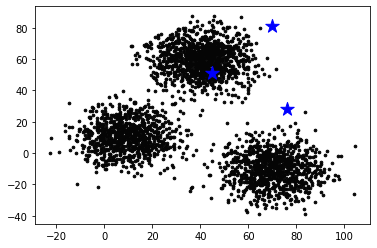

In [12]:
# YOUR CODE HERE : Scatter plot 'f1' vs 'f2' and Centriods ('C')
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

Now we will put our learning from above together and see how exactly k-means algorithm works.

### Applying  K-means algorithm 



Now let us write a function to calculate Euclidean Distance between two array of points 'a' and 'b' or centroids

**Note:** Refer to the following link to understand how [linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) works

In [13]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax) # YOUR CODE HERE : Calculate euclidean distance between a and b
           # NOTE: The input 'a' can either be a point or an array of points (of same length as 'b'); 'b' is an array of points.
           # HINT : You can use 'linalg.norm' function from numpy package

error: 48.40963
error: 21.153124
error: 15.151571
error: 1.4800686
error: 0.042818844


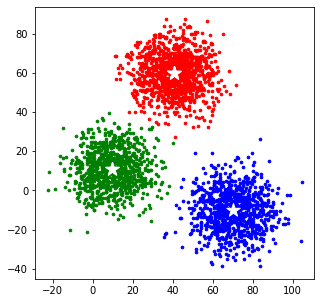

In [15]:
# To store the value of centroids. Initialize with zero
C_old = np.zeros(C.shape)

# Initialize clusters of x[i] with zeros
clusters = np.zeros(len(X))

# Error func - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()       # Plot keeps getting updated in loop, So turning on plot in interactive mode
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each sample/data point to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C) # YOUR CODE HERE : Calculate distance of 'X[i]' from each of the 3 centroid points contained within 'C'.
                    # HINT : Use 'dist' function defined above                    
        cluster = np.argmin(distances)  # The centroid with the least distance is found here out of all the distances found above
        clusters[i] = cluster    # The cluster center found above is now the new cluster assignment for the point X[i]

    # Storing the old centroid values
    C_old = deepcopy(C)   # We use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
    # Finding the new centroids by taking the average value
    
    for i in range(k):     # We iterate through each of the 3 clusters.
        points = [X[j] for j in range(len(X)) if clusters[j] == i]  # We pull out all the points that were assigned to the new cluster above (in 'clusters' variable)
        # YOUR CODE HERE : Using the above generated 'points', recompute the new centroid, by taking the mean
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None) # YOUR CODE HERE : Calculate the error between the new cluster centres('C') and the old cluster centres ('C_old').
            # Hint : Use 'dist' function defined above
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='w')

    print("error:",error)


**Ungraded Exercise** change the number of cluster  and check how the plot is changing

In [16]:
# YOUR CODE HERE
# Number of clusters
k = 5

# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k) 

# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[63. 39.]
 [33. 11.]
 [32. 49.]
 [25. 46.]
 [51. 45.]]


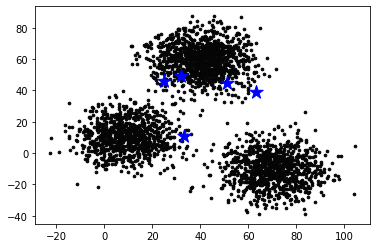

In [17]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

### Please answer the questions below to complete the experiment:

In [19]:
#@title State True or False: In this experiment, after initializing the random centroids, the first step inolves, computing the mean?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer= "TRUE" #@param ["","TRUE","FALSE"]


In [20]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [22]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [23]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [24]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [25]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [26]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8934
Date of submission:  04 Nov 2020
Time of submission:  08:48:09
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
